In [30]:
import numpy as np
import pandas as pd
import seaborn as ss
import matplotlib.pyplot as py

In [31]:
df=pd.read_excel('world.xlsx')

In [32]:
df.head(5)

,Birth Rate,Business Tax Rate,CO2 Emissions,Country,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
0,0.020,NaN,87931.0,Algeria,NaN,NaN,26998.0,"$54,790,058,957",0.035,$60,...,67.0,0.0,1,0.342,0.619,0.039,31719449,0.599,"$102,000,000","$193,000,000"
1,0.050,NaN,9542.0,Angola,NaN,NaN,7499.0,"$9,129,594,819",0.034,$22,...,44.0,0.0,1,0.476,0.499,0.025,13924930,0.324,"$34,000,000","$146,000,000"
2,0.043,NaN,1617.0,Benin,NaN,NaN,1983.0,"$2,359,122,303",0.043,$15,...,53.0,0.0,1,0.454,0.517,0.029,6949366,0.383,"$77,000,000","$50,000,000"
3,0.027,NaN,4276.0,Botswana,NaN,NaN,1836.0,"$5,788,311,645",0.047,$152,...,49.0,0.1,1,0.383,0.587,0.029,1755375,0.532,"$227,000,000","$209,000,000"
4,0.046,NaN,1041.0,Burkina Faso,NaN,NaN,NaN,"$2,610,959,139",0.051,$12,...,49.0,0.0,1,0.468,0.505,0.028,11607944,0.178,"$23,000,000","$30,000,000"


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2704 entries, 0 to 2703
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Birth Rate              2585 non-null   float64
 1   Business Tax Rate       1423 non-null   object 
 2   CO2 Emissions           2125 non-null   float64
 3   Country                 2704 non-null   object 
 4   Days to Start Business  1718 non-null   float64
 5   Ease of Business        185 non-null    float64
 6   Energy Usage            1785 non-null   float64
 7   GDP                     2494 non-null   object 
 8   Health Exp % GDP        2395 non-null   float64
 9   Health Exp/Capita       2395 non-null   object 
 10  Hours to do Tax         1416 non-null   float64
 11  Infant Mortality Rate   2444 non-null   float64
 12  Internet Usage          2531 non-null   float64
 13  Lending Interest        1880 non-null   float64
 14  Life Expectancy Female  2568 non-null   

In [34]:
df['GDP'] = df['GDP'].astype(str).str.replace('$', '', regex=True).str.replace(',', '')
df['GDP'] = pd.to_numeric(df['GDP'], errors='coerce')

df['Health Exp/Capita'] = df['Health Exp/Capita'].astype(str).str.replace('$', '', regex=True)
df['Health Exp/Capita'] = pd.to_numeric(df['Health Exp/Capita'], errors='coerce')

df['Tourism Inbound'] = df['Tourism Inbound'].astype(str).str.replace('$', '', regex=True).str.replace(',', '')
df['Tourism Inbound'] = pd.to_numeric(df['Tourism Inbound'], errors='coerce')

df['Tourism Outbound'] = df['Tourism Outbound'].astype(str).str.replace('$', '', regex=True).str.replace(',', '')
df['Tourism Outbound'] = pd.to_numeric(df['Tourism Outbound'], errors='coerce')

df['Business Tax Rate'] = df['Business Tax Rate'].astype(str).str.replace('%', '', regex=True)
df['Business Tax Rate'] = pd.to_numeric(df['Business Tax Rate'], errors='coerce')


In [35]:
df.describe()

,Birth Rate,Business Tax Rate,CO2 Emissions,Days to Start Business,Ease of Business,Energy Usage,GDP,Health Exp % GDP,Health Exp/Capita,Hours to do Tax,...,Life Expectancy Male,Mobile Phone Usage,Number of Records,Population 0-14,Population 15-64,Population 65+,Population Total,Population Urban,Tourism Inbound,Tourism Outbound
count,2585.000000,1423.000000,2.125000e+03,1718.000000,185.000000,1.785000e+03,2.494000e+03,2395.000000,1932.000000,1416.000000,...,2568.000000,2537.000000,2704.0,2484.000000,2484.000000,2484.000000,2.704000e+03,2678.000000,2.336000e+03,2.233000e+03
mean,0.022715,48.966901,1.423071e+05,39.999418,94.875676,7.723684e+04,2.638540e+11,0.064170,214.627847,302.068503,...,66.461838,0.578124,1.0,0.303051,0.623481,0.073465,3.145729e+07,0.562953,4.939320e+09,4.729435e+09
std,0.011338,40.954116,6.159288e+05,57.318588,54.791906,2.599239e+05,1.129910e+12,0.026325,233.750350,273.299686,...,9.390217,0.474647,0.0,0.106577,0.069660,0.049541,1.242894e+08,0.245897,1.385098e+10,1.326774e+10
min,0.007000,8.200000,7.000000e+00,1.000000,1.000000,8.000000e+00,6.310127e+07,0.008000,2.000000,12.000000,...,37.000000,0.000000,1.0,0.118000,0.474000,0.003000,1.887600e+04,0.082000,7.000000e+05,2.000000e+05
25%,0.013000,32.400000,1.360000e+03,13.000000,48.000000,3.737000e+03,3.539042e+09,0.046000,37.000000,156.000000,...,61.000000,0.100000,1.0,0.204750,0.559000,0.033000,8.783360e+05,0.356000,1.250000e+08,1.100000e+08
50%,0.020000,41.000000,8.529000e+03,26.000000,94.000000,1.433800e+04,1.507975e+10,0.061000,115.500000,239.000000,...,69.000000,0.500000,1.0,0.299500,0.642500,0.052000,5.800324e+06,0.560000,6.885000e+08,4.560000e+08
75%,0.031000,51.550000,5.910800e+04,45.000000,142.000000,4.185200e+04,1.102047e+11,0.079000,318.250000,344.750000,...,73.250000,0.900000,1.0,0.402000,0.676000,0.112000,2.014089e+07,0.765000,3.601500e+09,2.842000e+09
max,0.053000,339.100000,8.286892e+06,694.000000,189.000000,2.727728e+06,1.624460e+13,0.225000,998.000000,2600.000000,...,88.000000,2.900000,1.0,0.500000,0.858000,0.244000,1.350695e+09,1.000000,2.000920e+11,1.265730e+11


In [36]:
df = df.rename(columns={'Birth Rate': 'BirthRate', 'Business Tax Rate': 'BusinessTaxRate','CO2 Emissions':'CO2Emissions','Days to Start Business':'DaystoStartBusiness','Ease of Business':'EaseofBusiness','Energy Usage':'EnergyUsage',
                            'Health Exp % GDP':'HealthExpGDP','Health Exp/Capita':'HealthExpCapita','Hours to do Tax':'HourstodoTax','Infant Mortality Rate':'InfantMortalityRate','Internet Usage':'InternetUsage','Lending Interest':'LendingInterest',
                            'Life Expectancy Female':'LifeExpectancyFemale','Life Expectancy Male':'LifeExpectancyMale','Mobile Phone Usage':'MobilePhoneUsage','Number of Records':'NumberofRecords','Population 0-14':'Population0to14',
                            'Population 15-64':'Population15to64','Population 65+':'Populationmorethan65','Population Total':'PopulationTotal','Population Urban':'PopulationUrban','Tourism Inbound':'TourismInbound','Tourism Outbound':'TourismOutbound'})


In [37]:
df.isnull().sum()

BirthRate                119
BusinessTaxRate         1281
CO2Emissions             579
Country                    0
DaystoStartBusiness      986
EaseofBusiness          2519
EnergyUsage              919
GDP                      210
HealthExpGDP             309
HealthExpCapita          772
HourstodoTax            1288
InfantMortalityRate      260
InternetUsage            173
LendingInterest          824
LifeExpectancyFemale     136
LifeExpectancyMale       136
MobilePhoneUsage         167
NumberofRecords            0
Population0to14          220
Population15to64         220
Populationmorethan65     220
PopulationTotal            0
PopulationUrban           26
TourismInbound           368
TourismOutbound          471
dtype: int64

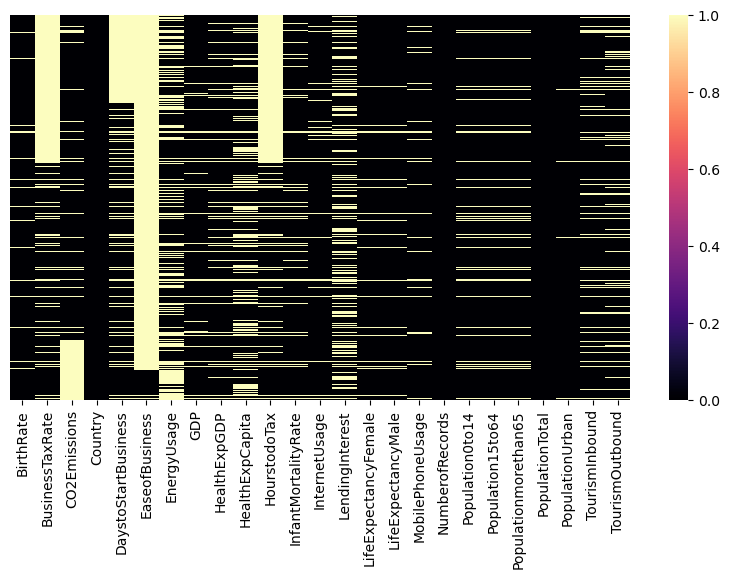

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10,5))
sns.heatmap(df.isnull(),cmap='magma',yticklabels=False,cbar=True)
plt.show()

**We can see that**

 **Ease of bussiness' contain large number of missing values**
 
 
**'Population Urban' contain less number of missing values**
 
-**There is no missing values in 'Country' and 'Population Total'**

In [39]:

#There are 26 null values in population urban column which is less than 1% values so droping those rows
df.dropna(subset=['PopulationUrban'],inplace=True)



In [40]:
df['BusinessTaxRate'] = df['BusinessTaxRate'].fillna(df['BusinessTaxRate'].mean())
df['EaseofBusiness'] = df['EaseofBusiness'].fillna(df['EaseofBusiness'].mean())
df['HealthExpGDP'] = df['HealthExpGDP'].fillna(df['HealthExpGDP'].mean())
df['HourstodoTax'] = df['HourstodoTax'].fillna(df['HourstodoTax'].mean())
df['Population0to14'] = df['Population0to14'].fillna(df['Population0to14'].mean())

df['BirthRate'] = df['BirthRate'].fillna(df['BirthRate'].median())
df['CO2Emissions'] = df['CO2Emissions'].fillna(df['CO2Emissions'].median())
df['DaystoStartBusiness'] = df['DaystoStartBusiness'].fillna(df['DaystoStartBusiness'].median())
df['EnergyUsage'] = df['EnergyUsage'].fillna(df['EnergyUsage'].median())
df['HealthExpCapita'] = df['HealthExpCapita'].fillna(df['HealthExpCapita'].mean())
df['GDP'] = df['GDP'].fillna(df['GDP'].median())
df['InfantMortalityRate'] = df['InfantMortalityRate'].fillna(df['InfantMortalityRate'].median())
df['InternetUsage'] = df['InternetUsage'].fillna(df['InternetUsage'].median())
df['LendingInterest'] = df['LendingInterest'].fillna(df['LendingInterest'].median())
df['LifeExpectancyFemale'] = df['LifeExpectancyFemale'].fillna(df['LifeExpectancyFemale'].median())
df['LifeExpectancyMale'] = df['LifeExpectancyMale'].fillna(df['LifeExpectancyMale'].median())
df['MobilePhoneUsage'] = df['MobilePhoneUsage'].fillna(df['MobilePhoneUsage'].median())
df['TourismInbound'] = df['TourismInbound'].fillna(df['TourismInbound'].median())
df['TourismOutbound'] = df['TourismOutbound'].fillna(df['TourismOutbound'].median())
df['Population15to64'] = df['Population15to64'].fillna(df['Population15to64'].median())
df['Populationmorethan65'] = df['Populationmorethan65'].fillna(df['Populationmorethan65'].median())


In [41]:
print("{} missing values present in whole data.".format(df.isnull().sum().sum()))

0 missing values present in whole data.


**<h2>Model_Building**

In [42]:
x=df.drop('Country',axis=1)

In [43]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data = scaler.fit_transform(x)
data = pd.DataFrame(data, columns=x.columns)

**<H2>hierarchical Clustring**

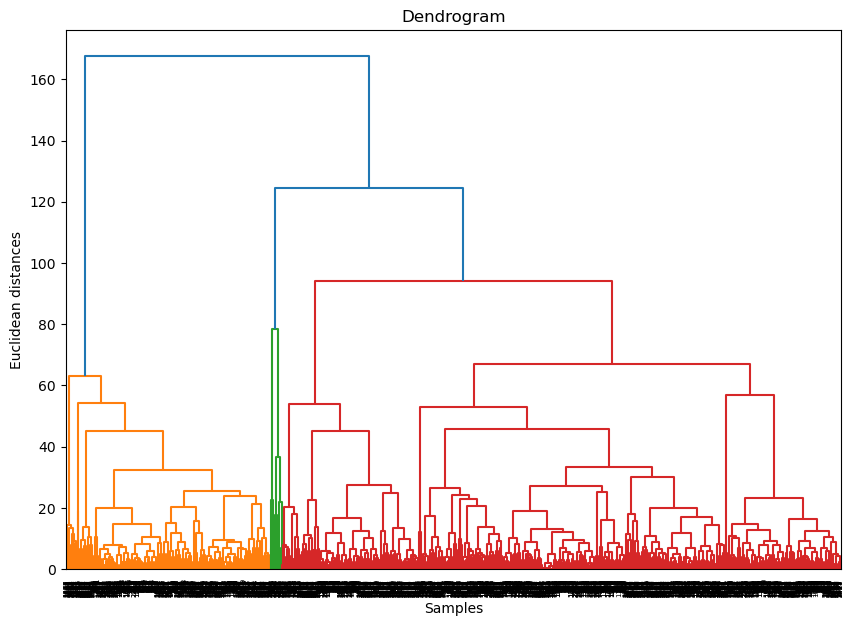

In [46]:
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt


plt.figure(figsize=(10, 7))
dendrogram = sch.dendrogram(sch.linkage(data, method='ward'))
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean distances')
plt.show()


**from above  dendrogram we can Choose the number of clusters is 3**


In [56]:
n_clusters=3
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters=n_clusters, metric='euclidean', linkage='ward')
clusters = hc.fit_predict(data)
data['Hirechiecial_Cluster'] = clusters



In [57]:
from sklearn.metrics import silhouette_score

silhouette_avg = silhouette_score(data.drop('Hirechiecial_Cluster', axis=1), data['Hirechiecial_Cluster'])

print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg}")


Silhouette Score for 3 clusters: 0.30988218390475475


**<h2>K-means Clustring**

In [59]:
data1=data.drop('Hirechiecial_Cluster',axis=1)

**finding optimal number of clusters using elbow method**

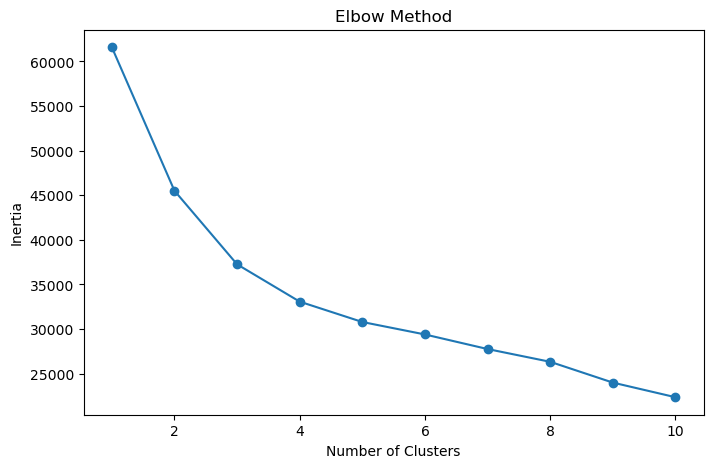

In [63]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data1)
    inertia.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()


**By above elbow curve we choose optimal number of clusters are 5**

In [67]:
n_clusters = 5
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans_clusters = kmeans.fit_predict(data1)

data1['KMeans_Cluster'] = kmeans_clusters


kmeans_silhouette_score = silhouette_score(data1, kmeans_clusters)
print(f"K-Means Silhouette Score for {n_clusters} clusters: {kmeans_silhouette_score}")

K-Means Silhouette Score for 5 clusters: 0.3659105401607483


**<h2>DB-SCAN Model**

In [69]:
data2=data1.drop('KMeans_Cluster',axis=1)

**finding optimal value of epsion(eps)using  k-distance graph.**

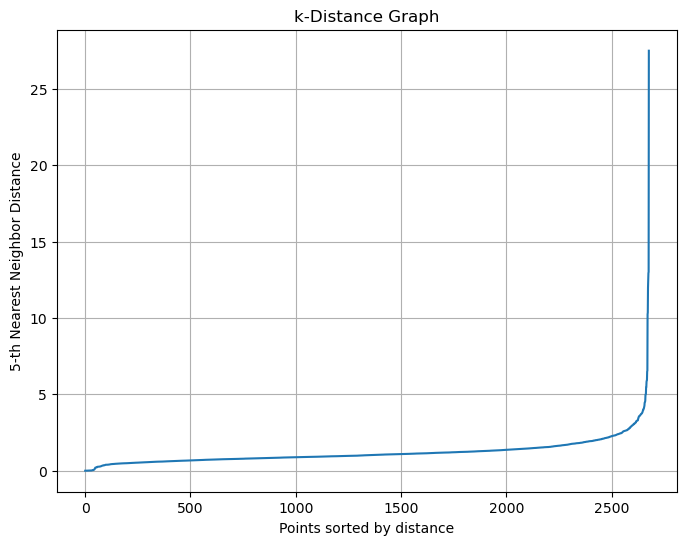

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors

min_samples = 5

neighbors = NearestNeighbors(n_neighbors=min_samples)
neighbors_fit = neighbors.fit(data2)
distances, indices = neighbors_fit.kneighbors(data2)

distances = np.sort(distances[:, min_samples-1], axis=0)

plt.figure(figsize=(8, 6))
plt.plot(distances)
plt.title('k-Distance Graph')
plt.xlabel('Points sorted by distance')
plt.ylabel(f'{min_samples}-th Nearest Neighbor Distance')
plt.grid(True)
plt.show()


**From above k-distance graph best eps value is 4.5**

In [72]:
from sklearn.cluster import DBSCAN
from sklearn.metrics import silhouette_score

dbscan = DBSCAN(eps=4.5, min_samples=23) 
dbscan_clusters = dbscan.fit_predict(data2)

data2['DBSCAN_Cluster'] = dbscan_clusters

silhouette_avg_dbscan = silhouette_score(data2, dbscan_clusters)
print(f"DBSCAN Silhouette Score: {silhouette_avg_dbscan}")

DBSCAN Silhouette Score: 0.653922197689752


**We find best the  Acuuracy in Dbscan Model**